# Day083
## 訓練神經網路的細節與技巧 - Batch normalization
對於 Input 的數值，前面提到建議要 re-scale
- Weights 修正的路徑會比較像在同心圓山谷中往下滑
- 只加在輸入層 re-scale 不夠，你可以每一層都 re-scale !!
### Batch Normalization
- 每個 input feature 獨立做 normalization
- 利用 batch statistics 做 normalization 而非整份資料
- 同一筆資料在不同的 batch 中會有些微不同
- BN：將輸入經過 t 轉換後輸出
    - 訓練時：使用 Batch 的平均值
    - 推論時：使用 Moving Average
- 可以解決 Gradient vanishing 的問題
- 可以用比較大的 learning rate
- 加速訓練
- 取代 dropout & regularizes
- 目前大多數的 Deep neural network 都會加

## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""
Write your training loop and record results
"""

for batch in BATCH_SIZE:
    print(f"Experiment with batch normalization = {batch}")
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)


    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"batch-{batch}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with batch normalization = 2
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________

50000/50000 [==============================] - 130s 3ms/step - loss: 2.2500 - acc: 0.1579 - val_loss: 2.8226 - val_acc: 0.2088
Epoch 46/50
50000/50000 [==============================] - 128s 3ms/step - loss: 2.2420 - acc: 0.1574 - val_loss: 2.5595 - val_acc: 0.2186
Epoch 47/50
50000/50000 [==============================] - 129s 3ms/step - loss: 2.2434 - acc: 0.1612 - val_loss: 2.5943 - val_acc: 0.1889
Epoch 48/50
50000/50000 [==============================] - 131s 3ms/step - loss: 2.2388 - acc: 0.1643 - val_loss: 2.7768 - val_acc: 0.1852
Epoch 49/50
50000/50000 [==============================] - 130s 3ms/step - loss: 2.2471 - acc: 0.1624 - val_loss: 2.9628 - val_acc: 0.1710
Epoch 50/50
50000/50000 [==============================] - 128s 3ms/step - loss: 2.2440 - acc: 0.1649 - val_loss: 2.7991 - val_acc: 0.1971
Experiment with batch normalization = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input

50000/50000 [==============================] - 88s 2ms/step - loss: 1.1348 - acc: 0.5988 - val_loss: 1.4574 - val_acc: 0.4954
Epoch 44/50
50000/50000 [==============================] - 108s 2ms/step - loss: 1.1592 - acc: 0.5897 - val_loss: 1.3891 - val_acc: 0.5143
Epoch 45/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.1346 - acc: 0.5967 - val_loss: 1.4175 - val_acc: 0.5081
Epoch 46/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.1294 - acc: 0.6022 - val_loss: 1.3432 - val_acc: 0.5337
Epoch 47/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.1241 - acc: 0.6004 - val_loss: 1.4086 - val_acc: 0.5126
Epoch 48/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.1219 - acc: 0.6029 - val_loss: 1.3954 - val_acc: 0.5162
Epoch 49/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.1113 - acc: 0.6067 - val_loss: 1.3572 - val_acc: 0.5259
Epoch 50/50
50000/50000 [==========

50000/50000 [==============================] - 9s 170us/step - loss: 0.8878 - acc: 0.6823 - val_loss: 1.5412 - val_acc: 0.5092
Epoch 42/50
50000/50000 [==============================] - 9s 170us/step - loss: 0.8711 - acc: 0.6887 - val_loss: 1.4739 - val_acc: 0.5187
Epoch 43/50
50000/50000 [==============================] - 9s 170us/step - loss: 0.8695 - acc: 0.6906 - val_loss: 1.5446 - val_acc: 0.5062
Epoch 44/50
50000/50000 [==============================] - 9s 170us/step - loss: 0.8614 - acc: 0.6914 - val_loss: 1.5234 - val_acc: 0.5063
Epoch 45/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.8477 - acc: 0.6996 - val_loss: 1.4790 - val_acc: 0.5131
Epoch 46/50
50000/50000 [==============================] - 8s 170us/step - loss: 0.8453 - acc: 0.6994 - val_loss: 1.5200 - val_acc: 0.5061
Epoch 47/50
50000/50000 [==============================] - 9s 170us/step - loss: 0.8345 - acc: 0.7015 - val_loss: 1.5358 - val_acc: 0.5162
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 3s 69us/step - loss: 0.3971 - acc: 0.8633 - val_loss: 2.2521 - val_acc: 0.4680
Epoch 40/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.3810 - acc: 0.8680 - val_loss: 2.2700 - val_acc: 0.4587
Epoch 41/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.3677 - acc: 0.8742 - val_loss: 2.1403 - val_acc: 0.4787
Epoch 42/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.3501 - acc: 0.8808 - val_loss: 2.3385 - val_acc: 0.4499
Epoch 43/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.3293 - acc: 0.8878 - val_loss: 2.2788 - val_acc: 0.4701
Epoch 44/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.3216 - acc: 0.8900 - val_loss: 2.2491 - val_acc: 0.4774
Epoch 45/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.3050 - acc: 0.8975 - val_loss: 2.4852 - val_acc: 0.4544
Epoch 46/50
50000/50000 [=====================

Epoch 38/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.3135 - acc: 0.9042 - val_loss: 2.1111 - val_acc: 0.4753
Epoch 39/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.2995 - acc: 0.9091 - val_loss: 2.1471 - val_acc: 0.4735
Epoch 40/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.2861 - acc: 0.9140 - val_loss: 2.1979 - val_acc: 0.4663
Epoch 41/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.2718 - acc: 0.9187 - val_loss: 2.2772 - val_acc: 0.4581
Epoch 42/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.2546 - acc: 0.9256 - val_loss: 2.3224 - val_acc: 0.4657
Epoch 43/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.2393 - acc: 0.9301 - val_loss: 2.2872 - val_acc: 0.4611
Epoch 44/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.2255 - acc: 0.9353 - val_loss: 2.3985 - val_acc: 0.4631
Epoch 45/50
50000/50000 [=========

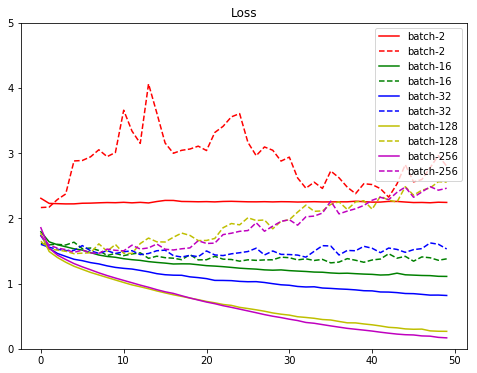

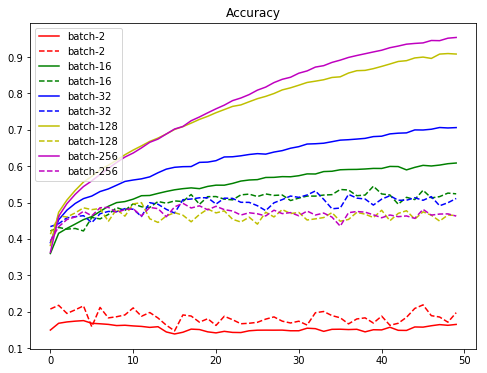

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Plot results
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

> Batch大一點不只是準確率會提高，訓練速度也比較快，但也容易 overfitting

### 放在 Activation 之前

In [9]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [10]:
from keras.layers import BatchNormalization, Activation, Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(512, input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
__________

50000/50000 [==============================] - 2s 38us/step - loss: 0.5710 - acc: 0.8427 - val_loss: 1.5272 - val_acc: 0.4924
Epoch 48/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.5525 - acc: 0.8494 - val_loss: 1.5536 - val_acc: 0.4978
Epoch 49/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.5335 - acc: 0.8580 - val_loss: 1.5479 - val_acc: 0.4915
Epoch 50/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.5166 - acc: 0.8646 - val_loss: 1.5541 - val_acc: 0.5009


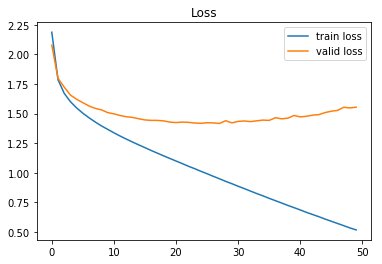

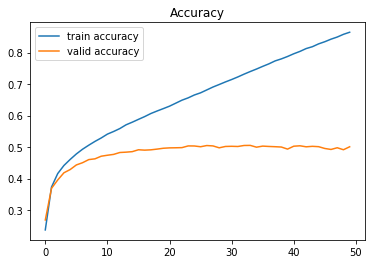

In [11]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### 放在Input之前

In [12]:
from keras.layers import Input
model = Sequential()
model.add(BatchNormalization(input_shape=x_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 3072)              12288     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
__________

Epoch 49/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.8277 - acc: 0.7286 - val_loss: 1.3995 - val_acc: 0.5269
Epoch 50/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.8142 - acc: 0.7347 - val_loss: 1.4018 - val_acc: 0.5253


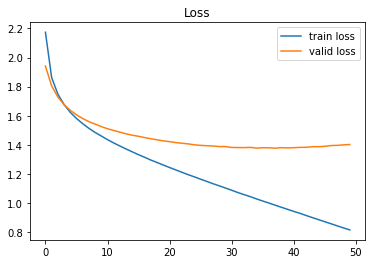

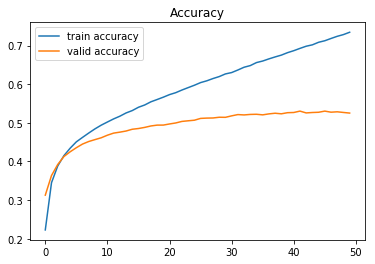

In [13]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()